# Heatmap of Day Ahead LMPs

In this example, we will download today's LMP prices at each of the CAISO trading hubs. We will then plot the prices on a heatmap.

In [1]:
import gridstatus

## Get LMPs

We can use the gridstatus method to download LMP prices from CAISO

In [2]:
iso = gridstatus.CAISO()

df = iso.get_lmp(
    date="today",  # you can change to desired date
    market="DAY_AHEAD_HOURLY",
    locations=[
        "TH_NP15_GEN-APND",
        "TH_SP15_GEN-APND",
        "TH_ZP26_GEN-APND",
    ],  # you can change to desired locations
)

next, let's clean up the data

In [3]:
# Convert to Hour Ending
df["Hour"] = df["Time"].dt.hour + 1

# Better names for locations
df["Location"] = df["Location"].map(
    {
        "TH_NP15_GEN-APND": "NP15",
        "TH_SP15_GEN-APND": "SP15",
        "TH_ZP26_GEN-APND": "ZP26",
    }
)

## Make Heatmap

We can make the heatmap by using the builtin heatmap visualization function

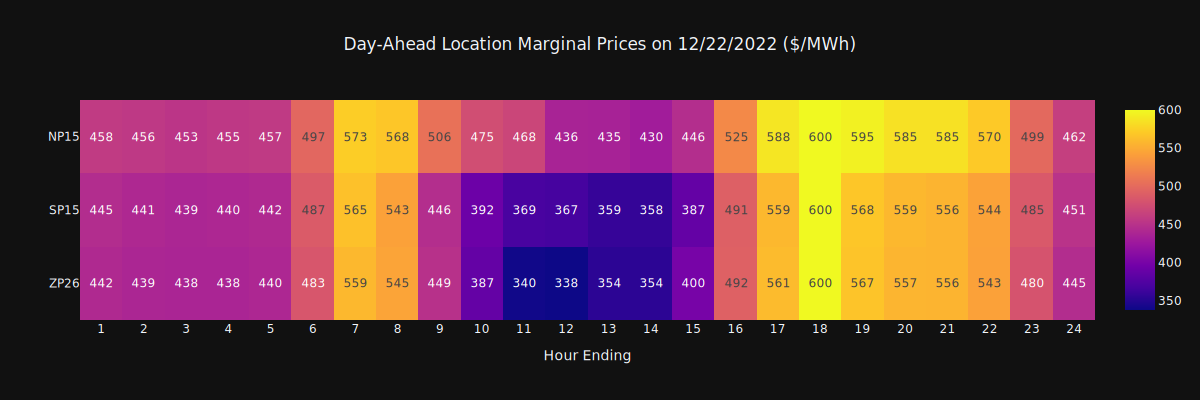

In [4]:
fig = gridstatus.viz.dam_heat_map(df)
fig.show("svg", width=1200, height=400)